In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [85]:
uber=pd.read_csv('C:\\datasets\\cab_rides.csv')
uber.head(10)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
5,0.44,Lyft,1545071112138,North Station,Haymarket Square,16.5,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black
6,1.08,Lyft,1543208580200,Northeastern University,Back Bay,10.5,1.0,462816a3-820d-408b-8549-0b39e82f65ac,lyft_plus,Lyft XL
7,1.08,Lyft,1543780384677,Northeastern University,Back Bay,16.5,1.0,474d6376-bc59-4ec9-bf57-4e6d6faeb165,lyft_lux,Lux Black
8,1.08,Lyft,1543818482645,Northeastern University,Back Bay,3.0,1.0,4f9fee41-fde3-4767-bbf1-a00e108701fb,lyft_line,Shared
9,1.08,Lyft,1543315522249,Northeastern University,Back Bay,27.5,1.0,8612d909-98b8-4454-a093-30bd48de0cb3,lyft_luxsuv,Lux Black XL


In [24]:
uber.drop(['id','product_id','time_stamp'],axis=1,inplace=True)

In [25]:
uber.head()

,distance,cab_type,destination,source,price,surge_multiplier,name
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,Lyft
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL


In [26]:
uber.describe()

,distance,price,surge_multiplier
count,693071.000000,637976.000000,693071.000000
mean,2.189430,16.545125,1.013870
std,1.138937,9.324359,0.091641
min,0.020000,2.500000,1.000000
25%,1.280000,9.000000,1.000000
50%,2.160000,13.500000,1.000000
75%,2.920000,22.500000,1.000000
max,7.860000,97.500000,3.000000


In [27]:
uber.shape

(693071, 7)

In [28]:
uber.isnull().sum()

distance                0
cab_type                0
destination             0
source                  0
price               55095
surge_multiplier        0
name                    0
dtype: int64

In [29]:
uber['cab_type']=pd.get_dummies(uber['cab_type'])
uber.head()

,distance,cab_type,destination,source,price,surge_multiplier,name
0,0.44,1,North Station,Haymarket Square,5.0,1.0,Shared
1,0.44,1,North Station,Haymarket Square,11.0,1.0,Lux
2,0.44,1,North Station,Haymarket Square,7.0,1.0,Lyft
3,0.44,1,North Station,Haymarket Square,26.0,1.0,Lux Black XL
4,0.44,1,North Station,Haymarket Square,9.0,1.0,Lyft XL


In [30]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
uber['destination']=pd.DataFrame(lc.fit_transform(uber['destination']))
uber.head()

,distance,cab_type,destination,source,price,surge_multiplier,name
0,0.44,1,7,Haymarket Square,5.0,1.0,Shared
1,0.44,1,7,Haymarket Square,11.0,1.0,Lux
2,0.44,1,7,Haymarket Square,7.0,1.0,Lyft
3,0.44,1,7,Haymarket Square,26.0,1.0,Lux Black XL
4,0.44,1,7,Haymarket Square,9.0,1.0,Lyft XL


In [31]:
lc=LabelEncoder()
uber['source']=pd.DataFrame(lc.fit_transform(uber['source']))
uber.head()

,distance,cab_type,destination,source,price,surge_multiplier,name
0,0.44,1,7,5,5.0,1.0,Shared
1,0.44,1,7,5,11.0,1.0,Lux
2,0.44,1,7,5,7.0,1.0,Lyft
3,0.44,1,7,5,26.0,1.0,Lux Black XL
4,0.44,1,7,5,9.0,1.0,Lyft XL


In [32]:
lc=LabelEncoder()
uber['name']=pd.DataFrame(lc.fit_transform(uber['name']))
uber.head()

,distance,cab_type,destination,source,price,surge_multiplier,name
0,0.44,1,7,5,5.0,1.0,7
1,0.44,1,7,5,11.0,1.0,2
2,0.44,1,7,5,7.0,1.0,5
3,0.44,1,7,5,26.0,1.0,4
4,0.44,1,7,5,9.0,1.0,6


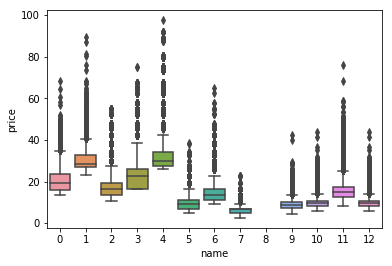

In [33]:
sns.boxplot(x='name',y='price', data=uber)

In [34]:
def price_approx(cols):
    price= cols[0]
    name=cols[1]
    
    if pd.isnull(price):
        if name==0:
            return 20
        elif name==1:
            return 30
        elif name==2:
            return 18
        elif name==3:
            return 25
        elif name==4:
            return 30
        elif name==5:
            return 10
        elif name==6:
            return 15
        elif name==7:
            return 8
        elif name==8:
            return 16
        elif name==9:
            return 10
        elif name==10:
            return 10
        elif name==11:
            return 15
        else:
            return 10
    else:
        return price

In [35]:
uber['price']=uber[['price','name']].apply(price_approx,axis=1)

In [36]:
uber.isnull().sum()

distance            0
cab_type            0
destination         0
source              0
price               0
surge_multiplier    0
name                0
dtype: int64

(array([2.69805e+05, 2.40007e+05, 1.30154e+05, 4.38570e+04, 7.21500e+03,
        1.44000e+03, 4.08000e+02, 9.00000e+01, 7.30000e+01, 2.20000e+01]),
 array([ 2.5, 12. , 21.5, 31. , 40.5, 50. , 59.5, 69. , 78.5, 88. , 97.5]),
 <a list of 10 Patch objects>)

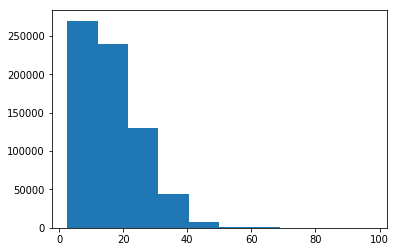

In [37]:
plt.hist(uber.iloc[:,4])

In [38]:
uber

,distance,cab_type,destination,source,price,surge_multiplier,name
0,0.44,1,7,5,5.0,1.0,7
1,0.44,1,7,5,11.0,1.0,2
2,0.44,1,7,5,7.0,1.0,5
3,0.44,1,7,5,26.0,1.0,4
4,0.44,1,7,5,9.0,1.0,6
5,0.44,1,7,5,16.5,1.0,3
6,1.08,1,8,0,10.5,1.0,6
7,1.08,1,8,0,16.5,1.0,3
8,1.08,1,8,0,3.0,1.0,7
9,1.08,1,8,0,27.5,1.0,4


In [39]:
c=uber.corr()
c

,distance,cab_type,destination,source,price,surge_multiplier,name
distance,1.000000,-0.001924,-0.147394,-0.091369,0.329984,0.024769,0.000705
cab_type,-0.001924,1.000000,-0.000835,-0.000912,0.084777,0.169522,-0.366068
destination,-0.147394,-0.000835,1.000000,-0.007584,-0.044437,-0.001027,0.000307
source,-0.091369,-0.000912,-0.007584,1.000000,-0.024337,-0.032521,0.000335
price,0.329984,0.084777,-0.044437,-0.024337,1.000000,0.240921,-0.574777
surge_multiplier,0.024769,0.169522,-0.001027,-0.032521,0.240921,1.000000,-0.081516
name,0.000705,-0.366068,0.000307,0.000335,-0.574777,-0.081516,1.000000


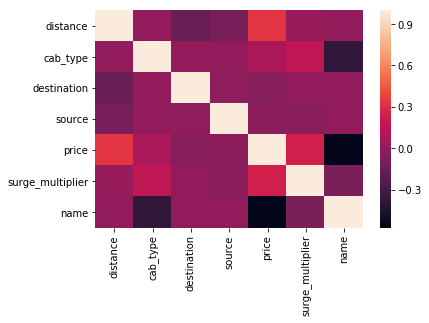

In [40]:
sns.heatmap(c)

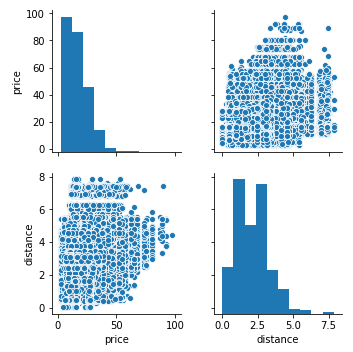

In [41]:
sns.pairplot(uber.iloc[:,[4,0]])

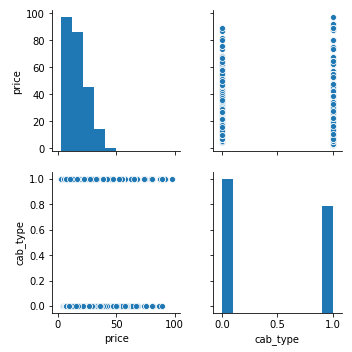

In [42]:
sns.pairplot(uber.iloc[:,[4,1]])

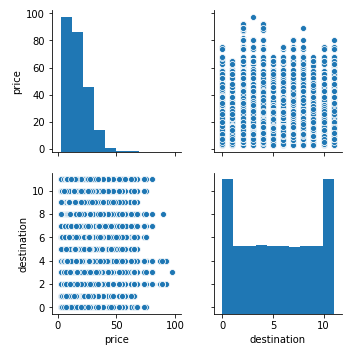

In [43]:
sns.pairplot(uber.iloc[:,[4,2]])

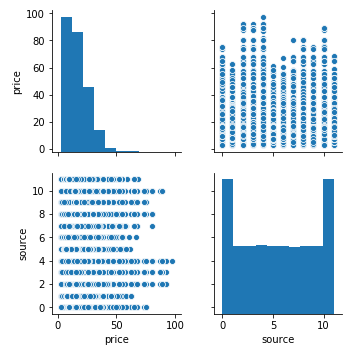

In [44]:
sns.pairplot(uber.iloc[:,[4,3]])

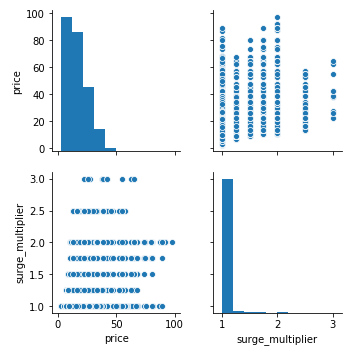

In [45]:
sns.pairplot(uber.iloc[:,[4,5]])

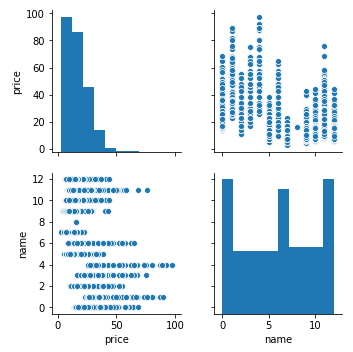

In [46]:
sns.pairplot(uber.iloc[:,[4,6]])

In [47]:
uber.columns

Index(['distance', 'cab_type', 'destination', 'source', 'price',
       'surge_multiplier', 'name'],
      dtype='object')

In [48]:
x=uber.iloc[:,[0,1,2,3,5,6]]
y=uber.iloc[:,4]

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=85)

In [50]:
reg=LinearRegression()

In [51]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
reg.coef_

array([ 2.56199045e+00, -3.20402984e+00,  1.08672165e-02,  3.23899028e-02,
        2.06070726e+01, -1.47360811e+00])

In [53]:
reg.intercept_


0.09349528312692001

In [54]:
y_pred=reg.predict(x_test)

In [55]:
y_pred

array([19.62572771, 26.03862072, 14.35040659, ..., 22.57333176,
       12.57176597, 21.11254658])

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5092756421160214

In [59]:
'''ts_score=[]
import numpy as np
for j in range (100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=j,test_size=0.1)
    lr=LinearRegression().fit(x_train,y_train)
    ts_score.append(lr.score(x_test,y_test))
k=ts_score.index(np.max(ts_score))'''

In [60]:
#k

85

#  Linearity Checking between Distance and Price



In [86]:
x=uber.iloc[:,[0]]    #Checking distance with logprice
y=uber.iloc[:,4]

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=51)

In [88]:
reg=LinearRegression()

In [89]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
reg.coef_

array([2.58450155])

In [91]:
reg.intercept_

10.842375744589992

In [92]:
y_pred=reg.predict(x_test)

In [93]:
y_pred

array([13.86624256, 22.21418257, 16.63165922, ..., 17.74299488,
       14.20222776, 14.84835315])

In [94]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.11434156086642733

In [80]:
'''ts_score=[]
import numpy as np
for j in range (100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=j,test_size=0.1)
    lr=LinearRegression().fit(x_train,y_train)
    ts_score.append(lr.score(x_test,y_test))
k=ts_score.index(np.max(ts_score))'''

In [81]:
#k

51

#  Decision Tree Regression

In [99]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [100]:
xd_train,xd_test,yd_train,yd_test=train_test_split(x,y,random_state=60,test_size=0.10)

In [101]:
from sklearn.tree import DecisionTreeRegressor
regression_tree=DecisionTreeRegressor(min_samples_split=0.03)
regression_tree.fit(xd_train,yd_train)
yd_pred=regression_tree.predict(xd_test)

In [102]:
from sklearn.metrics import r2_score
r2_score(yd_test,yd_pred)

0.909699700204823

In [103]:
'''ts_score=[]
import numpy as np
for j in range (100):
    xd_train,xd_test,yd_train,yd_test=train_test_split(x,y,random_state=j,test_size=0.10)
    dr=DecisionTreeRegressor(min_samples_split=0.03).fit(xd_train,yd_train)
    ts_score.append(dr.score(xd_test,yd_test))
k=ts_score.index(np.max(ts_score))'''

In [104]:
#k

60

#  Random Forest Regression

In [80]:
x=uber.iloc[:,[0,1,2,3,5,6]]
y=uber.iloc[:,4]

In [81]:
xf_train,xf_test,yf_train,yf_test=train_test_split(x,y,random_state=60,test_size=0.10)

In [82]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=61,random_state=60)
rf.fit(xf_train,yf_train)
yf_pred=rf.predict(xf_test)

In [83]:
from sklearn.metrics import r2_score
r2_score(yf_test,yf_pred)

0.9709157862092629

In [23]:
from sklearn.ensemble import RandomForestRegressor
#to find the k value(n_estimator)
error=[]
#calculating error for k values between 1 and 40
for i in range(3,100,2):
    rf=RandomForestRegressor(n_estimators=i)
    rf.fit(xf_train,yf_train)
    yf_pred=rf.predict(xf_test)
    error.append(np.mean(yf_pred != yf_test))

Text(0, 0.5, 'Mean Error')

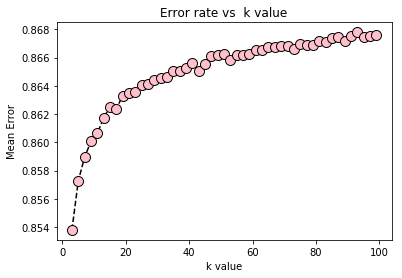

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(3,100,2),error,color='black',linestyle='dashed',marker='o',markerfacecolor='pink',markersize=10)
plt.title('Error rate vs  k value')
plt.xlabel('k value')
plt.ylabel('Mean Error')

In [84]:
yf=rf.predict([[1.08,1,8,0,1.0,3]])
yf

array([16.5])

In [73]:
#k

50

In [ ]:
'''ts_score=[]
import numpy as np
for j in range (100):
    xf_train,xf_test,yf_train,yf_test=train_test_split(x,y,random_state=j,test_size=0.10)
    rf=RandomForestRegressor(min_samples_split=0.03,random_state=50).fit(xf_train,yf_train)
    ts_score.append(rf.score(xf_test,yf_test))
k=ts_score.index(np.max(ts_score))'''